In [4]:
import sys
sys.path.append('scripts') # Adds higher directory to python modules path.


from TH_post import *
from TH_proc import *
from MeshMaker import *
from Aux_Functions import *

# Pre-processing

#### Read and inspect input file

Read predefined Input file

In [2]:
file_in = r'simulation_files/sample_problem_Test1P/Test_1P.in'
ip_data = read_TH_data(file_in)

Inspect the ELEME section

In [3]:
ip_data.ELEME.processed

,raw,ElName,NSEQ,NADD,MA12,elem_vol,elem_aht,elem_pm,X,Y,Z,elem_activity
0,A00 1 10.1000E+000.4000E+00 ...,A00 1,,,1,0.100,0.400,NaN,0.0510,-0.5,-0.5,
1,A00 2 10.1000E+000.4000E+00 ...,A00 2,,,1,0.100,0.400,NaN,0.1510,-0.5,-0.5,
2,A00 3 10.1000E+000.4000E+00 ...,A00 3,,,1,0.100,0.400,NaN,0.2510,-0.5,-0.5,
3,A00 4 10.1000E+000.4000E+00 ...,A00 4,,,1,0.100,0.400,NaN,0.3510,-0.5,-0.5,
4,A00 5 10.1000E+000.4000E+00 ...,A00 5,,,1,0.100,0.400,NaN,0.4510,-0.5,-0.5,
5,A00 6 10.1000E+000.4000E+00 ...,A00 6,,,1,0.100,0.400,NaN,0.5510,-0.5,-0.5,
6,A00 7 10.1000E+000.4000E+00 ...,A00 7,,,1,0.100,0.400,NaN,0.6510,-0.5,-0.5,
7,A00 8 10.1000E+000.4000E+00 ...,A00 8,,,1,0.100,0.400,NaN,0.7510,-0.5,-0.5,
8,A00 9 10.1000E+000.4000E+00 ...,A00 9,,,1,0.100,0.400,NaN,0.8510,-0.5,-0.5,
9,A0010 10.1000E+000.4000E+00 ...,A0010,,,1,0.100,0.400,NaN,0.9510,-0.5,-0.5,


Inspect the ROCKS section

In [4]:
ip_data.ROCKS.processed

,Name,NAD,DensG,Poros,Perm1,Perm2,Perm3,KThrW,SpcHt,PoMedRGrain,...,PhiCoeff2,PhiCoeff3,PhiCoeff4,PhiCoeff5,PhiCoeff6,LoComp,SatAtLoComp,HiComp,SatAtHiComp,DeltaSat
0,DIRT1,1,2600.0,0.3,2.960000e-13,2.960000e-13,2.960000e-13,3.1,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOUND,0,2600.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,100.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Edit the input file

Change porosity of the first rock type. And porosity model MOP(8).

Use `write_TH_data` function to write updated dataframe into file.

In [5]:
ip_data.ROCKS.processed.loc[0,'Poros'] = 0.15
ip_data.ROCKS.modified = True

ip_data.PARAM.processed.P_1.MOP_items[8] = str(2)
ip_data.PARAM.modified = True


In [6]:
new_ip_data = update_TH_data(ip_data)
print()

list_data=[]

for key in new_ip_data:
    if new_ip_data[key]['active']:
        list_data+=new_ip_data[key]['raw']

str_data='\n'.join(list_data)

print(str_data)


Updating with function MEMORY
Updating with function ROCKS
Updating with function PARAM

ŇTest_1PÓ ... Hydrate dissociation - depressurization
MEMORY
'HYDRATE-EQUILIBRIUM'
    2    3    4  .FALSE.                        ! NumCom, NumEqu, NumPhases, binary_diffusion
'Cartesian'     15    15     5 .FALSE. .FALSE.  ! coordinate_system, Max_NumElem, Max_NumConx, ElemNameLength, active_conx_only, boundaries_in_matrix
   2                                            ! MaxNum_SS
   2                                            ! MaxNum_Media
.FALSE. .FALSE. .FALSE. 'Saturation'            ! element_by_element_properties, porosity_perm_dependence, scaled_capillary_pressure, Option_tortuosity_CompuMethod
.FALSE. 'Continuous'                            ! coupled_geochemistry, property_update [= 'Continuous', 'Iteration', 'Timestep']
.FALSE. ' ' 'Continuous'    0                   ! coupled_geomechanics, geomechanical_code_name, property_update, num_geomech_param
ROCKS----1----*----2----*----3----*

# Post-processing

Read output and store it into a pickle file

In [8]:
file_in = r'simulation_files/sample_problem_Test1P/Test_1P.in'

data = get_output(file_in, write=True)
data

No pickle data available. Read and process
Processing single file
11  cells.  11  cells are active.
INCON element-specific initial conditions
Processing element specific initial conditions
AqH: 2 phases Aqueous+Hydrate
Aqu: 1 phase Aqueous
17 steps
Rocks referenced in ELEME as indexes
storing data into pickle file: simulation_files/sample_problem_Test1P/GRID_data.pkl


,ElName,x,y,z,I,J,K,dx,dy,dz,...,S_gas,S_icd,X_inh,k_rg,k_rw,k_adj_F,perm_abs,porosity,P_cap,P_aqu
time,,,,,,,,,,,,,,,,,,,,,
0.0,A00 0,0.0005,-0.5,-0.5,0,0,0,0.001,-1.0,-1.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,3.039750e+14,0.30000,NaN,NaN
0.0,A00 1,0.0510,-0.5,-0.5,1,0,0,0.100,-1.0,-1.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,3.039750e+14,0.30000,NaN,NaN
0.0,A00 2,0.1510,-0.5,-0.5,2,0,0,0.100,-1.0,-1.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,3.039750e+14,0.30000,NaN,NaN
0.0,A00 3,0.2510,-0.5,-0.5,3,0,0,0.100,-1.0,-1.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,3.039750e+14,0.30000,NaN,NaN
0.0,A00 4,0.3510,-0.5,-0.5,4,0,0,0.100,-1.0,-1.0,...,0.000000,0.0,NaN,NaN,NaN,NaN,3.039750e+14,0.30000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864000.0,A00 6,0.5510,-0.5,-0.5,6,0,0,0.100,-1.0,-1.0,...,0.063242,0.0,0.0,0.000719,0.699450,0.239276,2.999220e+02,0.29028,-0.064352,26.999672
864000.0,A00 7,0.6510,-0.5,-0.5,7,0,0,0.100,-1.0,-1.0,...,0.063734,0.0,0.0,0.000746,0.696869,0.237780,2.999220e+02,0.29028,-0.064767,26.999610
864000.0,A00 8,0.7510,-0.5,-0.5,8,0,0,0.100,-1.0,-1.0,...,0.064106,0.0,0.0,0.000766,0.694941,0.236723,2.999220e+02,0.29028,-0.065078,26.999562


Read Time_Series and Hydrate_Status files

In [8]:
file_in = r'simulation_files/sample_problem_Test2D/Test_2D.in'

sds, itf, hyd_st, ss_gr = read_Time_Series(file_in)

0 subdomain(s)
0 interface(s)
1 Hydrate_Status file
1 source/sink group(s)


In [11]:
ss_gr['Wells']

,Time:days,Q_G:kg/s,M_G(kg),Q_Gw:kg/s,M_Gw:kg,Q_A:kg/s,M_A:kg,Q_Aw:kg/s,M_Aw:kg,X_s:kg/kg,M_s:kg,Q_H:W,Q_CH4G:kg/s,M_CH4G:kg,Q_CH4A:kg/s,M_CH4A:kg
0,1.15741E-04,0.025563,0.255628,0.000004,0.000044,0.074437,0.744372,0.074251,0.742508,0.0,0.0,21073.7,0.025558,0.255584,0.000186,0.001864
1,3.47222E-04,0.025502,0.765662,0.000004,0.000132,0.074498,2.234340,0.074313,2.228760,0.0,0.0,21099.9,0.025497,0.765531,0.000186,0.005579
2,8.10185E-04,0.025402,1.781750,0.000004,0.000307,0.074598,5.218250,0.074413,5.205290,0.0,0.0,21130.0,0.025398,1.781450,0.000184,0.012959
3,1.73611E-03,0.025262,3.802740,0.000004,0.000658,0.074738,11.197300,0.074555,11.169700,0.0,0.0,21139.1,0.025258,3.802090,0.000182,0.027556
4,3.58796E-03,0.025109,7.820140,0.000004,0.001364,0.074891,23.179900,0.074712,23.123600,0.0,0.0,21065.6,0.025104,7.818780,0.000179,0.056268
5,7.29167E-03,0.024993,15.818000,0.000004,0.002785,0.075007,47.182000,0.074831,47.069600,0.0,0.0,20832.9,0.024989,15.815200,0.000175,0.112419
6,1.46991E-02,0.024949,31.785400,0.000004,0.005665,0.075051,95.214600,0.074880,94.992900,0.0,0.0,20412.5,0.024945,31.779700,0.000171,0.221723
7,2.95139E-02,0.024957,63.730300,0.000005,0.011514,0.075043,191.270000,0.074877,190.836000,0.0,0.0,19852.7,0.024952,63.718800,0.000166,0.433850
8,5.91435E-02,0.024977,127.672000,0.000005,0.023408,0.075023,383.328000,0.074862,382.483000,0.0,0.0,19221.5,0.024972,127.648000,0.000161,0.844918
9,1.18403E-01,0.024993,255.635000,0.000005,0.047592,0.075007,767.365000,0.074852,765.724000,0.0,0.0,18548.2,0.024988,255.587000,0.000155,1.641010


In [12]:
file_in = r'simulation_files/sample_problem_Test1P/Test_1P.in'

sds, itf, hyd_st, ss_gr = read_Time_Series(file_in)

0 subdomain(s)
1 interface(s)
1 Hydrate_Status file
0 source/sink group(s)


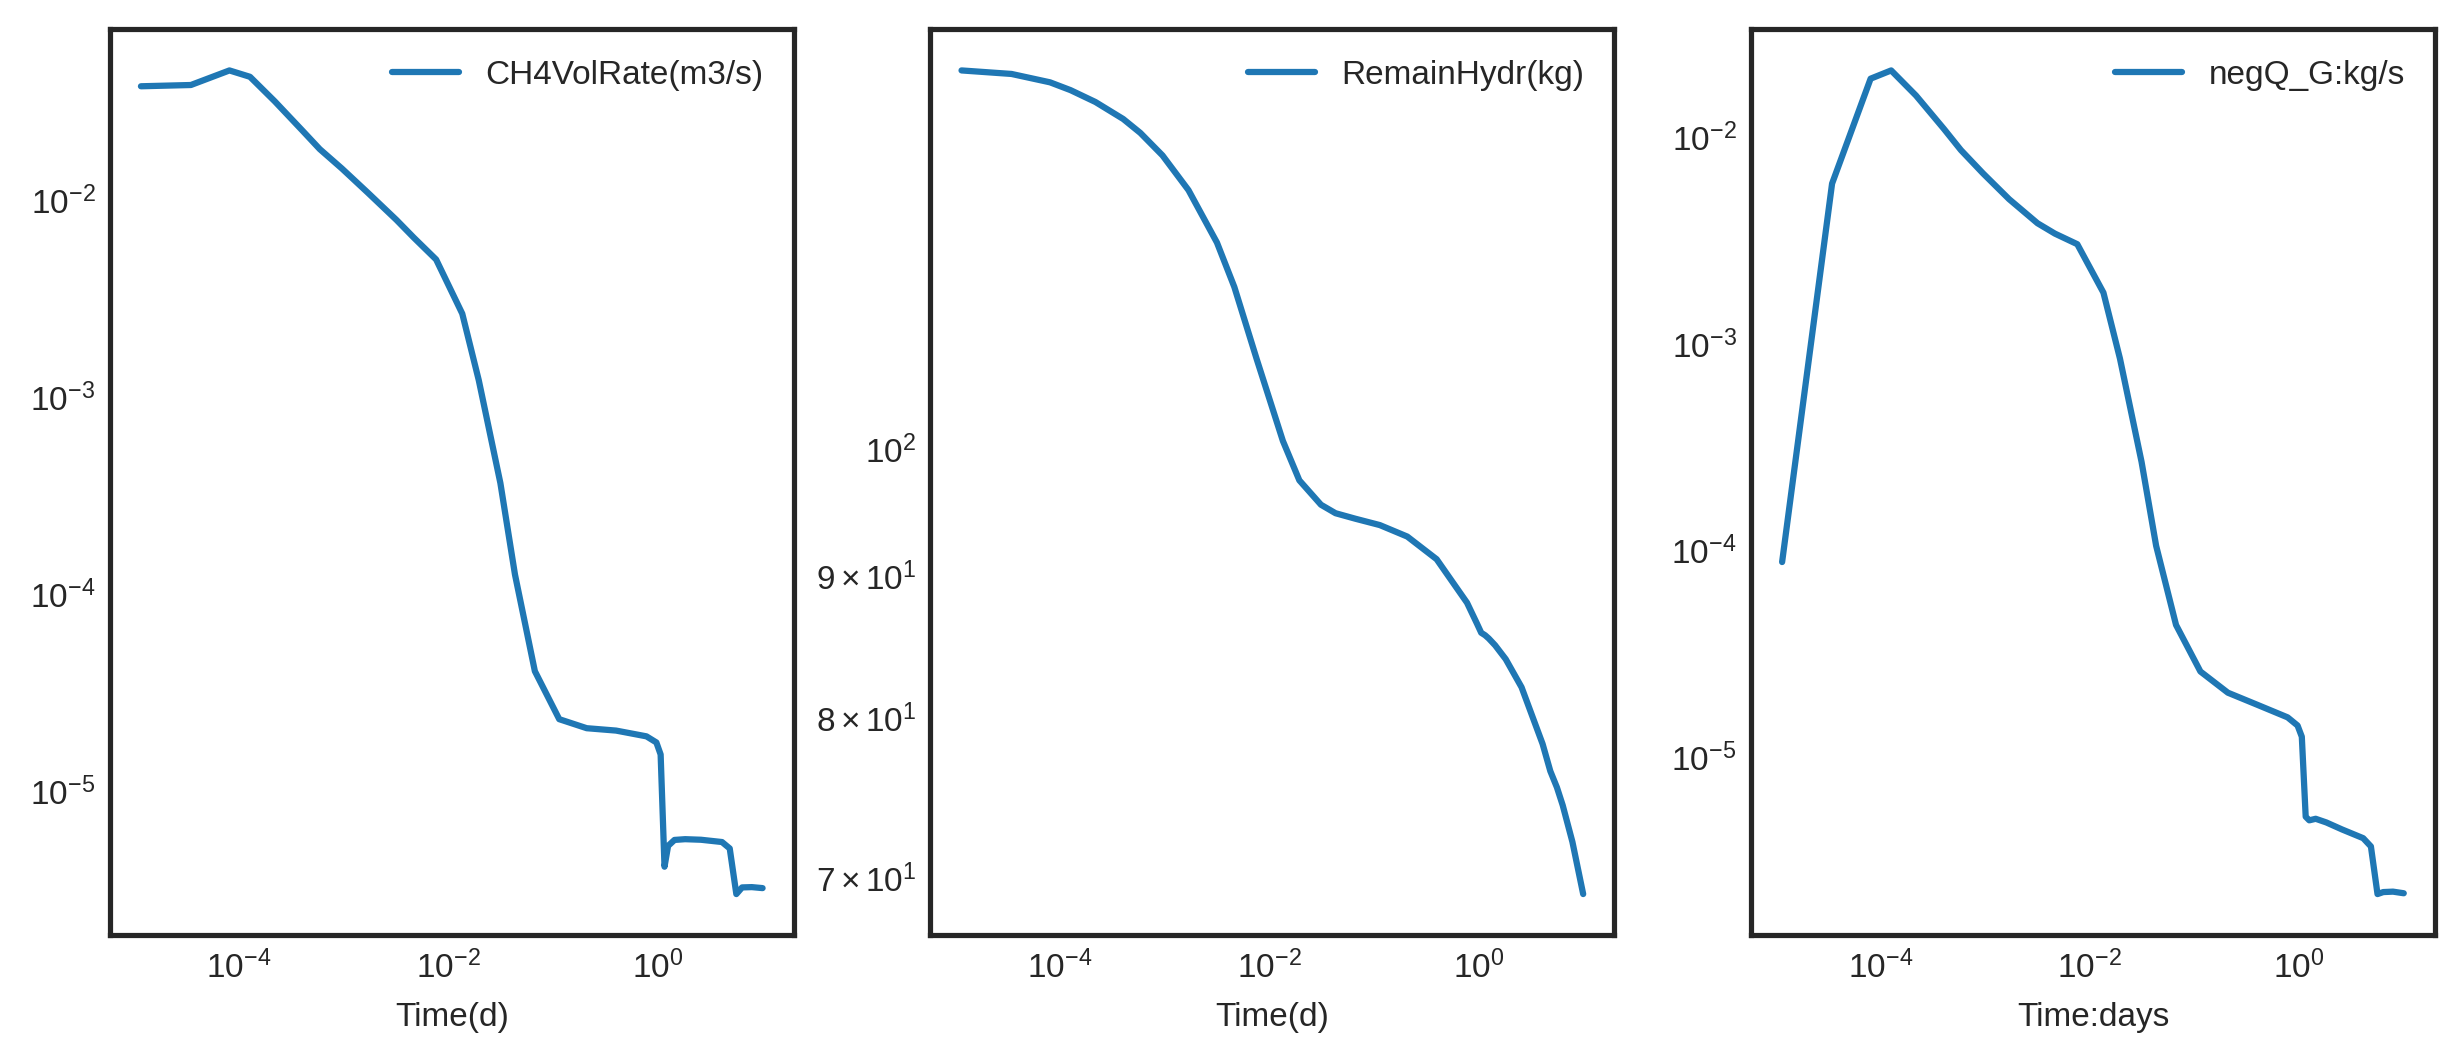

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn-white')
rcParams['image.cmap'] = 'viridis'
rcParams['figure.dpi'] = 300
rcParams['font.size'] = 8
rcParams['figure.figsize'] = [10,4]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

hyd_st.plot('Time(d)', 'CH4VolRate(m3/s)', ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')

hyd_st.plot('Time(d)', 'RemainHydr(kg)', ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')


itf['Int_1']['negQ_G:kg/s'] = itf['Int_1']['Q_G:kg/s']*-1
itf['Int_1'].plot('Time:days','negQ_G:kg/s', ax=ax3)
ax3.set_xscale('log')
ax3.set_yscale('log')


# Interactive display using Bokeh

These scripts are not 100% proof and would need some tweaking depending on the simulation files.

They cover only 2D and 1D simulations using cartesian grids

Adjust the `set_env BOKEH_ALLOW_WS_ORIGIN=localhost:8888` line accroding to your local specs.

In [9]:
%set_env BOKEH_ALLOW_WS_ORIGIN=localhost:8888

from TH_post_Bokeh import *
from bokeh.layouts import column, layout, row
from bokeh.models import ColumnDataSource, Slider, Select, LinearColorMapper, Button, Div, HoverTool, Span
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook
from bokeh.palettes import Viridis256
from bokeh.transform import  factor_cmap
from bokeh.embed import server_document

output_notebook()

env: BOKEH_ALLOW_WS_ORIGIN=localhost:8888


Loading BokehJS ...

In [10]:
def tough_app(doc):

    #Define plotting dimensions
    grid_dim = pd.DataFrame(index = range(3))
    grid_dim['dim'] = ['x','y','z']
    grid_dim['idx'] = ['I', 'J', 'K']
    grid_dim['size'] = [data.I.max()+1, data.J.max()+1, data.K.max()+1]

    grid_dim = grid_dim.sort_values(by=['size', 'dim'], ascending=[False, True])


    if (grid_dim['size']>1).all():
        print('3D grid')
        dim = ''.join(grid_dim['dim'][:2].to_list())
        button_idx = grid_dim.idx[0]

    elif len(grid_dim[grid_dim['size']>1]) == 2:
        print('2D grid')
        dim = ''.join(grid_dim['dim'][:2].sort_values().to_list())
        button_idx = grid_dim.idx[0]


    else:
        print('1D grid')
        dim = ''.join(grid_dim['dim'][:2].to_list()[::-1])
        button_idx = grid_dim.idx[1]

    #Retrieve time steps
    tsteps=data.index.get_level_values(0).drop_duplicates()
    tsteps=np.sort(tsteps)
    n_time_steps=len(tsteps)


    #Selector
    i = 0
    param ='MA12'
    param_select = list(data)[11:]

    i_idx_0 = data[button_idx].max()//2

    #widgets
    select_pmt=Select(value=param, title='Parameter',options=param_select)

    slider_time= Slider(start=0, end=n_time_steps-1, value=i, step=1, title="Time step")

    slider_1D = Slider(start=data[button_idx].min(), end=data[button_idx].max()+1, value=i_idx_0, step=1, title="{:s}-index".format(button_idx))

    i_idx = slider_1D.value

    #     slider_X_axis = Slider(start=data.I.min(), end=data.I.max(), value=data.I.max()//2, step=1, title="I-index")
    #     slider_Y_axis = Slider(start=data.J.min(), end=data.J.max(), value=data.J.max()//2, step=1, title="J-index")

    button_time_next = Button(label="Next")
    button_time_previous = Button(label="Previous")
    button_play = Button(label='► Play', width=80)

    #Define Data Sources
    data_source_2D = ColumnDataSource(data=data.loc[tsteps[i]])
    data_source_1D = ColumnDataSource(data=data[data[button_idx] == slider_1D.value].loc[tsteps[i]])


    #Create 2D figures
    top_2D_figure = create_figure1(data,select_pmt.value,tsteps,data_source_2D, plane=dim)
    bottom_2D_figure = create_figure2(data,tsteps,data_source_2D, plane=dim)

    top_2D_figure.add_tools(HoverTool(tooltips = set_str_tooltips(data, select_pmt.value)))
    bottom_2D_figure.add_tools(HoverTool(tooltips = set_str_tooltips(data, 'S_hyd','S_aqu','S_gas')))


    #Create 1D figures

    top_1D_figure = create_figure1_1D(data,select_pmt.value,tsteps,data_source_1D, axis = dim[1])
    top_1D_figure.xaxis.formatter.power_limit_low = -1
    top_1D_figure.xaxis.formatter.precision = 1
    top_1D_figure.xaxis.ticker.desired_num_ticks = 3    


    bottom_1D_figure = create_figure2_1D(data,tsteps,data_source_1D, axis = dim[1])

    Xloc=data[data[button_idx]== i_idx].x.max()
    vline = Span(location=Xloc, dimension='height', line_color='red', line_width=1)
    top_2D_figure.renderers.extend([vline])
    bottom_2D_figure.renderers.extend([vline])

    #PT-diagram
    if 'P_EqHydr' in param_select:

        X_range = (0,25)
        Y_range = (data['P'].min(),data['P'].max())

        plot_options = dict(toolbar_location=None,
                            x_range=X_range,
                            y_range=Y_range)  

        PT_fig = figure(**plot_options, plot_height=700)

        label_X = 'Temperature [degC]'
        label_Y = 'Pressure [MPa]'



        PT_fig.xaxis.axis_label = label_X

        PT_fig.yaxis.axis_label = label_Y

        PT_fig.line(x='T', y='P', 
                    color = '#ffa600', 
                    line_width=2, 
                    legend_label = 'Pressure',
                    source = data_source_1D)

        PT_fig.line(x='T', y='P_EqHydr', 
                    color = '#bc5090', 
                    line_width=2, 
                    legend_label = 'Stability curve',
                    source = data_source_1D)




    VAR=select_pmt.value


    def cb_slider_1D(attrname, old, new):
        global i_idx
        i_idx=new
        time_step=slider_time.value

        data_source_1D.data=data[data[button_idx] == i_idx].loc[tsteps[time_step]].to_dict('list')

        vline.location=data[data[button_idx] == new].x.max()

    def update(attr,old,new):
        #Update colors in 2d Xsections
        top_2D_figure.renderers[0].glyph.update(fill_color=set_color(data,select_pmt.value))
        top_1D_figure.renderers[0].glyph.update(x=select_pmt.value)

        #Update data in 1D plots
        top_1D_figure.xaxis.axis_label = select_pmt.value
        top_1D_figure.x_range.reset_start
        top_1D_figure.x_range.reset_end

        try:

            minv = data[select_pmt.value].min()
            maxv = data[select_pmt.value].max()

            if minv == 0 and maxv == 0:
                minv -= 0.5
                maxv += 0.5



            elif minv/maxv > 0.97:
                delta = (10**np.floor(np.log10(np.abs(minv))))/2
                minv -= delta
                maxv += delta




            top_1D_figure.x_range.start = minv
            top_1D_figure.x_range.end = maxv

        except:
            top_1D_figure.x_range.start = 0
            top_1D_figure.x_range.end = 1


        #Update Hovertool

        #Modification due to bug updating value only on tooltips
        top_2D_figure.tools.pop(-1)
        parameter_name = select_pmt.value
        tooltips_str = set_str_tooltips(data, parameter_name)
        top_2D_figure.add_tools(HoverTool(tooltips = tooltips_str))
    #         top_2D_figure.hover.tooltips = tooltips_str


    def cb_next():
        i = slider_time.value
        i = i + 1
        ev = "button next"
        time_step = i % (n_time_steps)
        slider_time.value = time_step

    #         print_info(ev,time_step)

    def cb_previous():
        i = slider_time.value
        i = i - 1
        ev = "button previous"

        time_step= i % (n_time_steps)
        slider_time.value = time_step

    #         print_info(ev,time_step)


    def cb_slider(attrname, old, new):
        global i
        time_step = slider_time.value
        i = slider_time.value
        title.text = '<h3>'+ time_string(tsteps[i]) +'</h3>'
        data_source_2D.data=data.loc[tsteps[time_step]].to_dict('list')
    #         data_source_wcol.data = data.loc[(data.MA12=='WATER') & (data.index == tsteps[i])].to_dict('list')

        data_source_1D.data=data[data[button_idx] == slider_1D.value].loc[tsteps[time_step]].to_dict('list')



    def animate_update():
        time_step = slider_time.value + 1
        if time_step > n_time_steps-1:
            time_step = 0
        slider_time.value = time_step


    callback_id = None

    def animate():
        global callback_id
        if button_play.label == '► Play':
            button_play.label = '❚❚ Pause'
            callback_id = doc.add_periodic_callback(animate_update, 200)
        else:
            button_play.label = '► Play'
            doc.remove_periodic_callback(callback_id)





    select_pmt.on_change('value',update)

    slider_time.on_change('value',cb_slider)
    slider_1D.on_change('value',cb_slider_1D)
    button_time_next.on_click(cb_next)
    button_time_previous.on_click(cb_previous)
    button_play.on_click(animate)


    buttons_row = row(button_play,button_time_previous, slider_time, button_time_next, slider_1D,width=800)
    top_row = row(top_2D_figure,top_1D_figure )
    bottom_row = row(bottom_2D_figure, bottom_1D_figure)
    title = Div(text='<h3>'+ time_string(tsteps[i]) +'</h3>')

    if 'P_EqHydr' in param_select:
        display_layout = layout([title],
                                [select_pmt],
                                [buttons_row],
                                [[[top_row],
                                [bottom_row]],
                                PT_fig])

    else:    
        display_layout = layout([title],
                                [select_pmt],
                                [buttons_row],
                                [top_2D_figure,top_1D_figure],
                                [bottom_2D_figure,bottom_1D_figure])


    doc.add_root(display_layout)


In [11]:
file_in = r'simulation_files/sample_problem_Test1P/Test_1P.in'

data = get_output(file_in)

Read pickle data


In [12]:
show(tough_app)

1D grid


In [19]:
file_in = r'simulation_files/sample_problem_Test2D/Test_2D.in'
data = get_output(file_in)

Read pickle data


In [20]:
show(tough_app)

2D grid


In [21]:
file_in = r'simulation_files/2D_HydrForm_sediments/BSR.in'
data = get_output(file_in)

Read pickle data


In [22]:
show(tough_app)

2D grid
